In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
#https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package  #Dataset link
weather_df = pd.read_csv(r'C:\Users\User\Downloads\archive (3)\WeatherAUS.csv')
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# EDA 

In [32]:
weather_df.shape

(145460, 23)

In [33]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [34]:
weather_df.dropna(subset=['RainToday', 'RainTomorrow'],inplace=True)

In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [7]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [8]:
num_cols = weather_df.select_dtypes(np.number).columns.to_list()
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

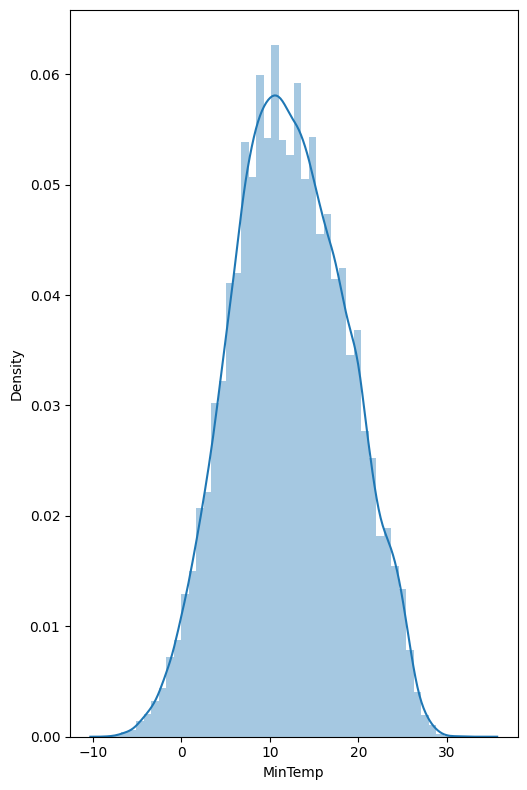

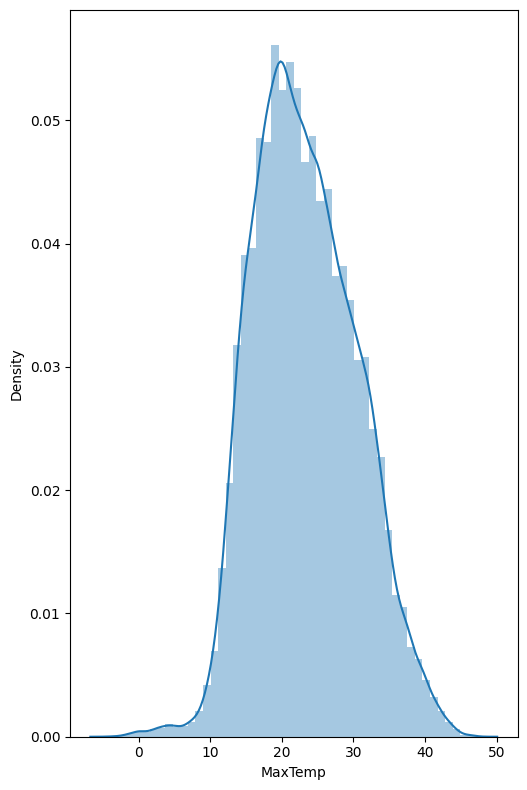

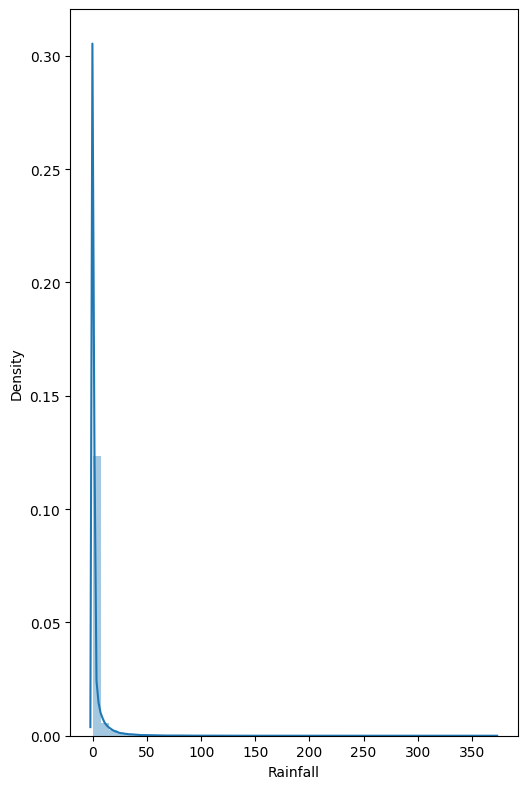

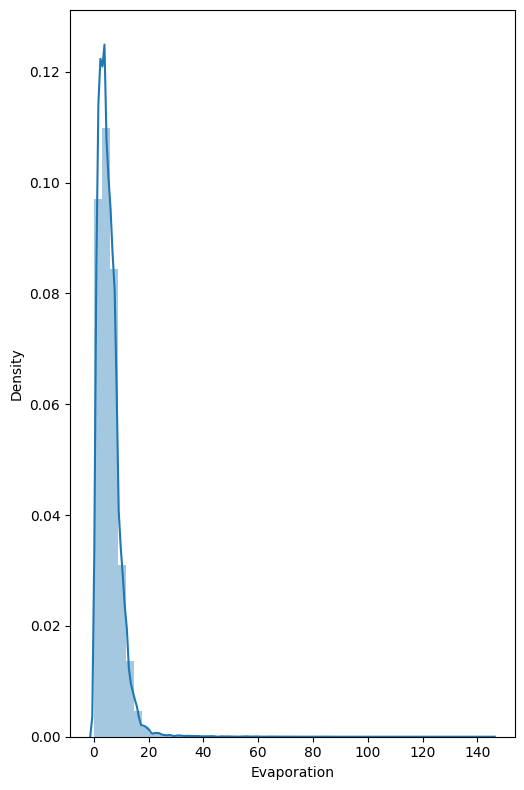

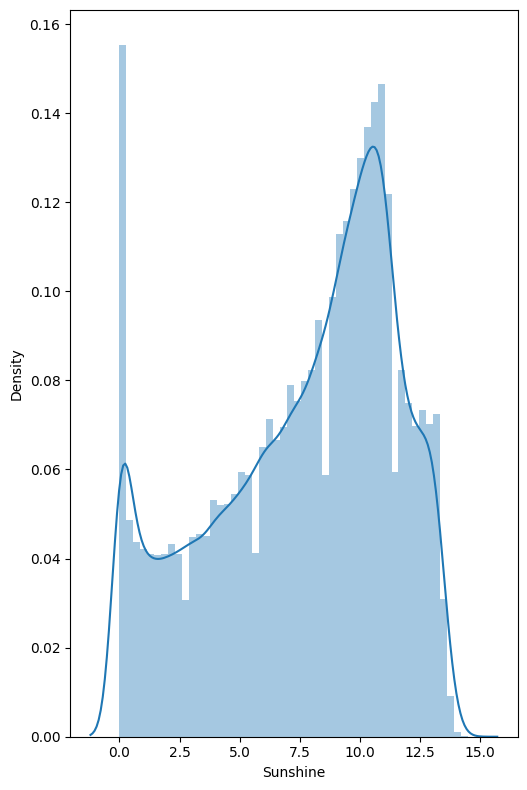

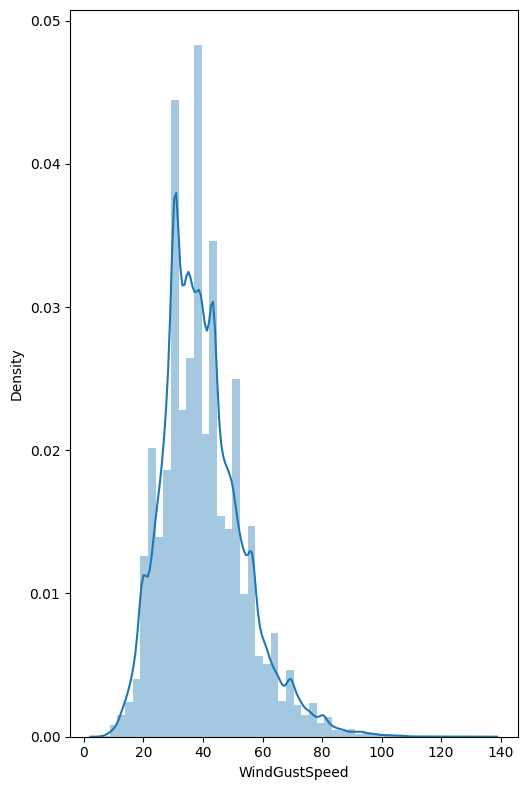

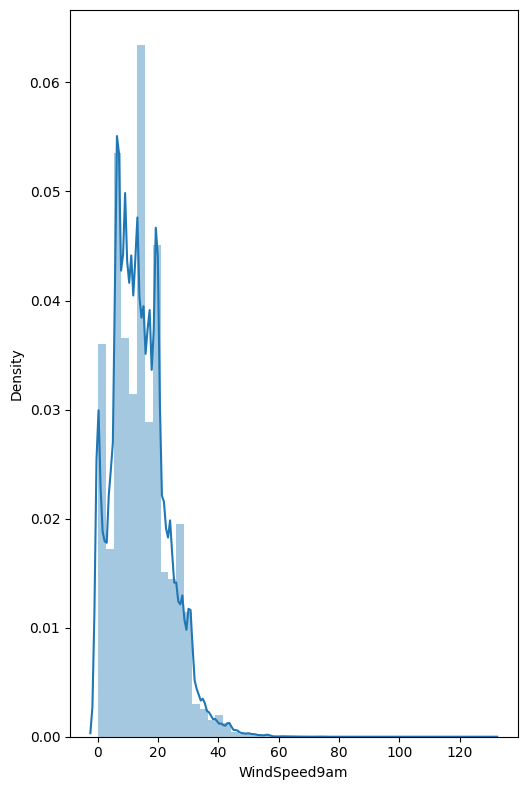

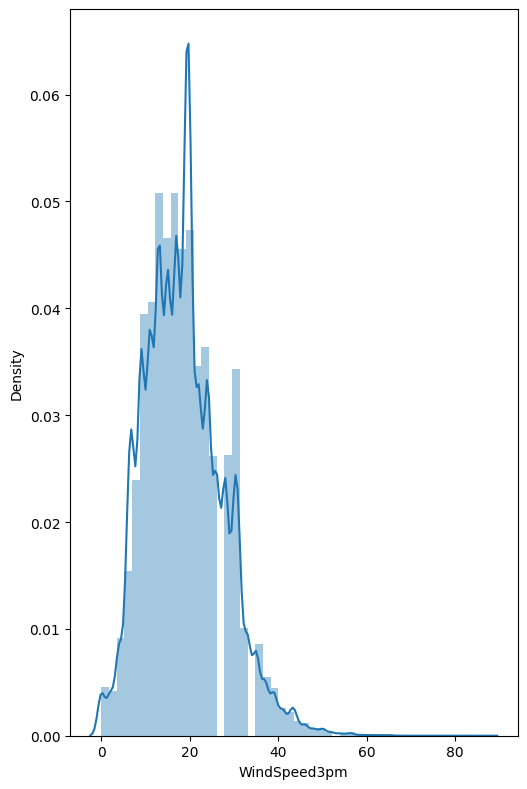

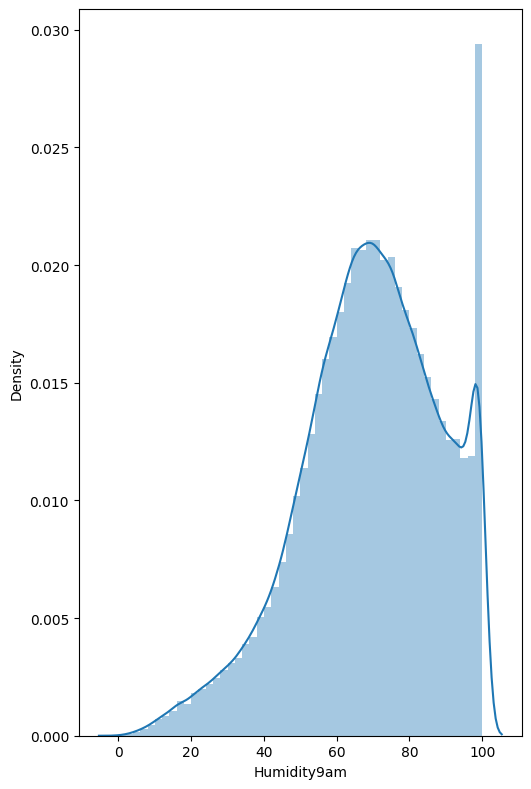

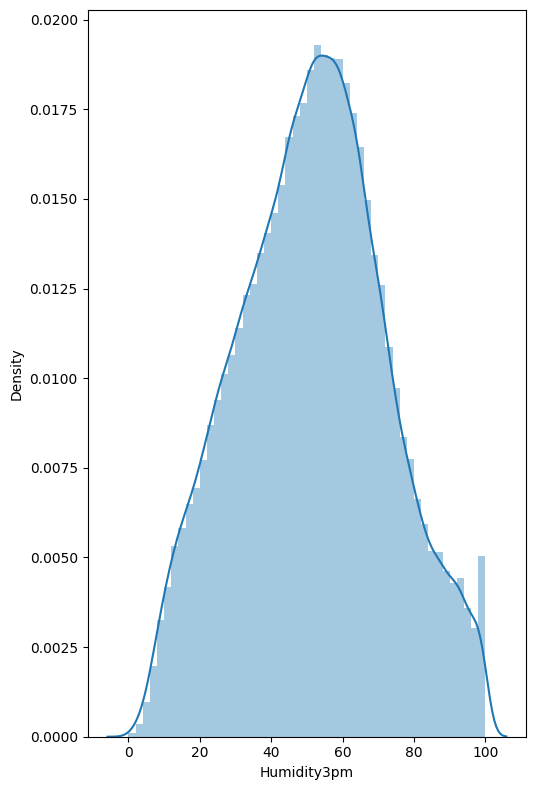

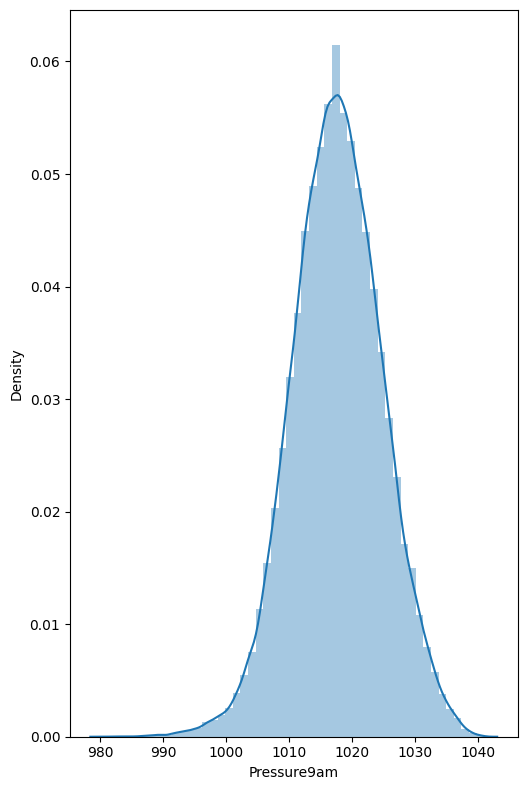

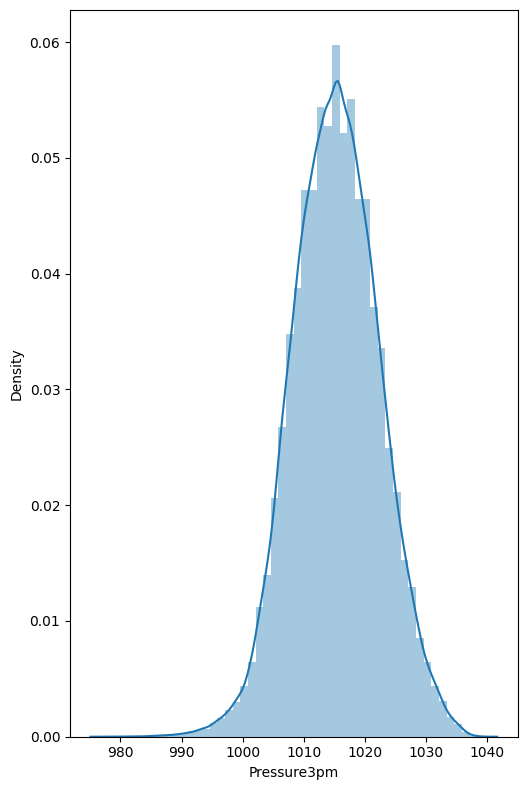

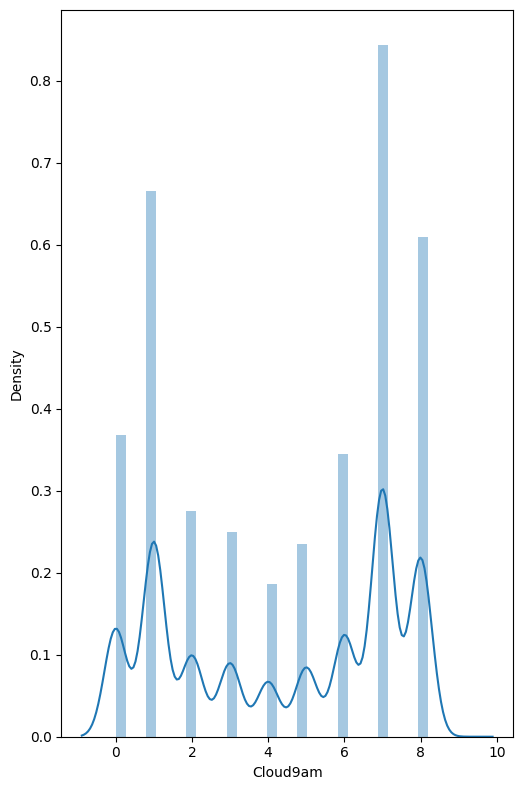

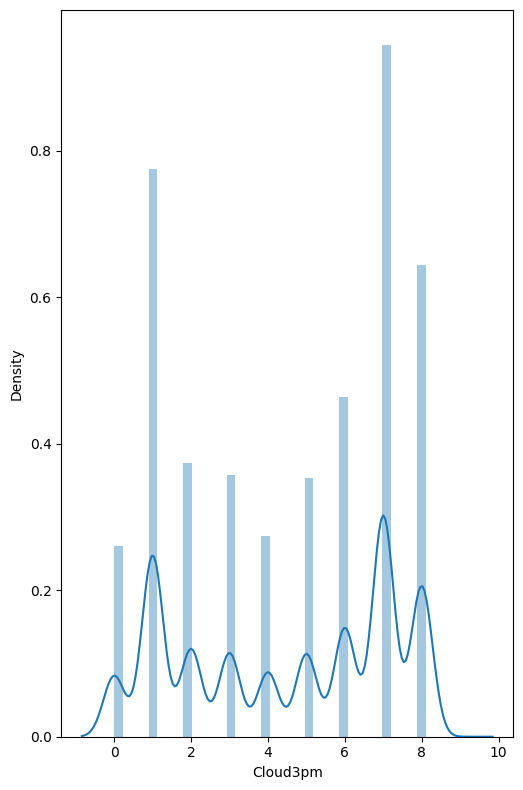

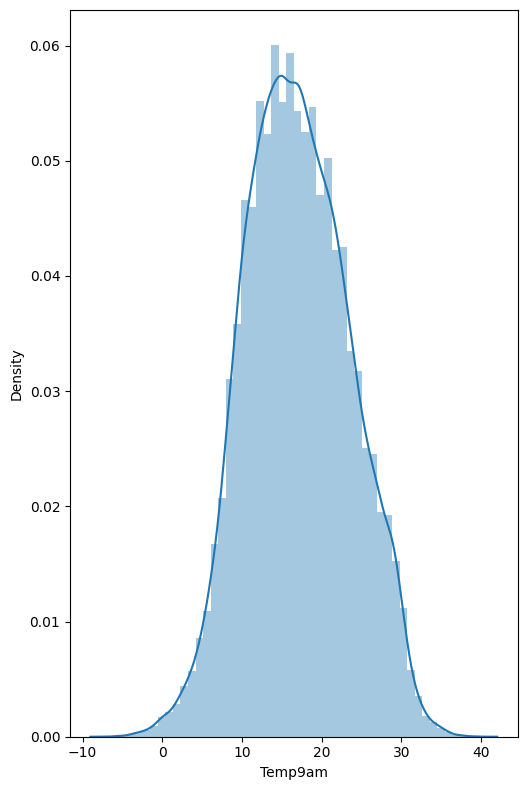

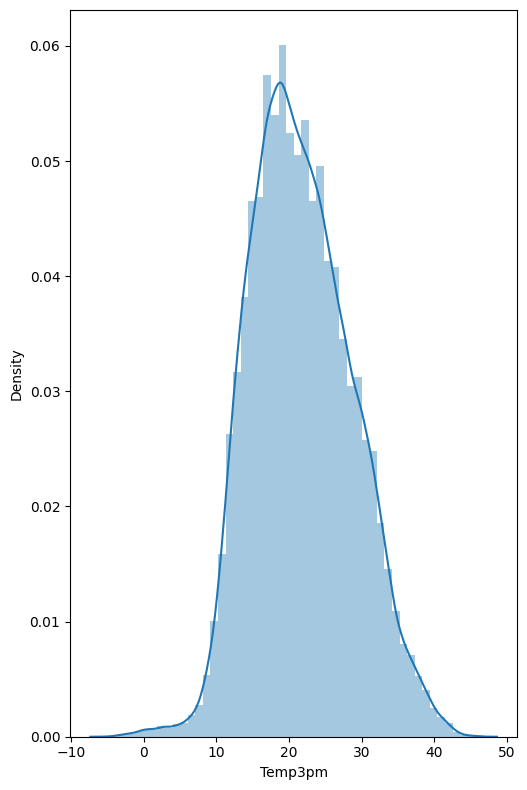

In [9]:
#plotting distribution of numeric columns
for col in weather_df[num_cols]:
    f = plt.figure(figsize=(10,8))
    ax = f.add_subplot(1,2,2)
    sns.distplot(weather_df[col])
    plt.tight_layout()
    plt.show()

In [23]:
weather_df[num_cols].isnull().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [25]:
#percentage of missing value
(weather_df[num_cols].isnull().sum() / len(weather_df)) * 100

MinTemp           0.332417
MaxTemp           0.218060
Rainfall          0.000000
Evaporation      42.400222
Sunshine         47.451114
WindGustSpeed     6.467216
WindSpeed9am      0.749359
WindSpeed3pm      1.797751
Humidity9am       1.077514
Humidity3pm       2.486735
Pressure9am       9.761555
Pressure3pm       9.780022
Cloud9am         37.379161
Cloud3pm         39.843167
Temp9am           0.465952
Temp3pm           1.863808
dtype: float64

In [35]:
#creating a copy of original df
df = weather_df.copy()

# Preprocessing

In [58]:
# Imputation would be done by mean[] as their missing percentage is under 10% and have more of normal distribution
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')
si.fit(df[['MinTemp', 'MaxTemp' , 'Humidity3pm', 'Pressure9am', 'Pressure3pm' , 'Temp9am', 'Temp3pm']])
df[['MinTemp', 'MaxTemp' , 'Humidity3pm', 
   'Pressure9am', 'Pressure3pm' , 'Temp9am', 'Temp3pm']] = si.transform(df[['MinTemp', 'MaxTemp' , 'Humidity3pm', 'Pressure9am',
                                                                                         'Pressure3pm' , 'Temp9am', 'Temp3pm']])

<AxesSubplot: xlabel='WindGustSpeed', ylabel='Density'>

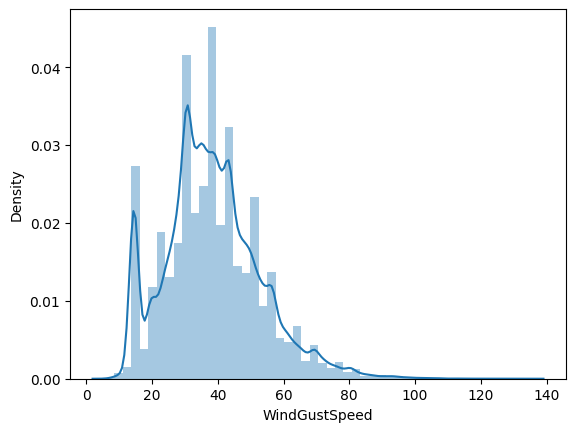

In [56]:
# Imputation would be done by IQR Proximity (End of Distribution) as their distribution is skewed
import random
def iqr(df):
    IQR = (df.quantile(.75)) - (df.quantile(.25))
    upper_limit = df.mean() + (1.5 * IQR)
    lower_limit = df.mean() - (1.5 * IQR)
    df = df.fillna(random.choice([upper_limit, lower_limit]))
    return df


sns.distplot(iqr(df.WindGustSpeed))

In [57]:
#Imputing
df.WindGustSpeed = iqr(df.WindGustSpeed)
df.WindSpeed9am = iqr(df.WindSpeed9am)
df.WindSpeed3pm = iqr(df.WindSpeed3pm)
df.Humidity9am = iqr(df.Humidity9am)

In [61]:
# High Number of Values is empty and the distribution also not normal will use KNNImputer 
from sklearn.impute import KNNImputer
ki = KNNImputer(n_neighbors = 3)
df.Evaporation = ki.fit_transform(df[['Evaporation']])

In [62]:
df.Sunshine = ki.fit_transform(df[['Sunshine']])

In [63]:
df.Cloud9am = ki.fit_transform(df[['Cloud9am']])

In [64]:
df.Cloud3pm = ki.fit_transform(df[['Cloud3pm']])

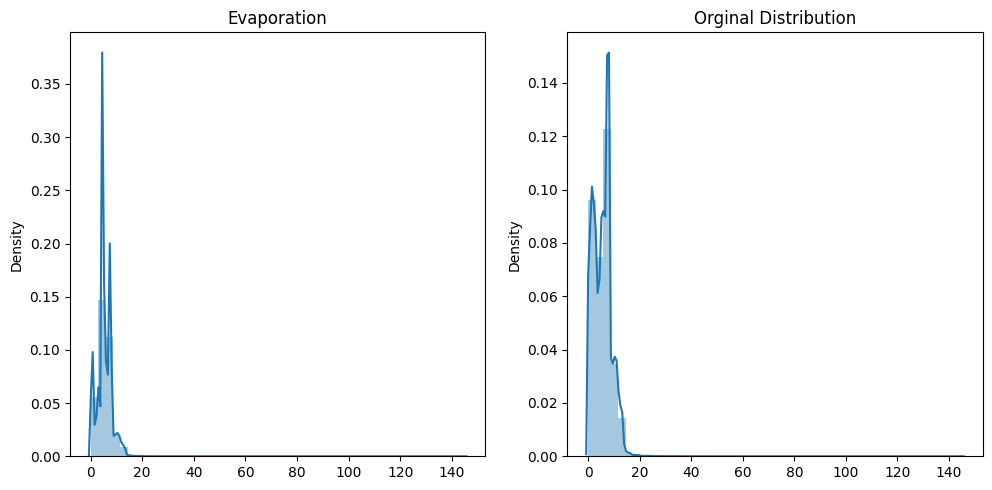

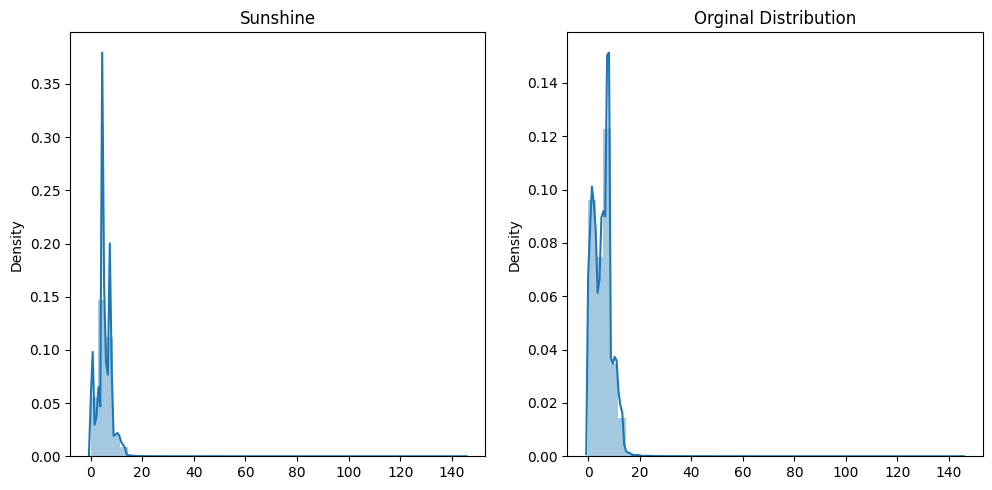

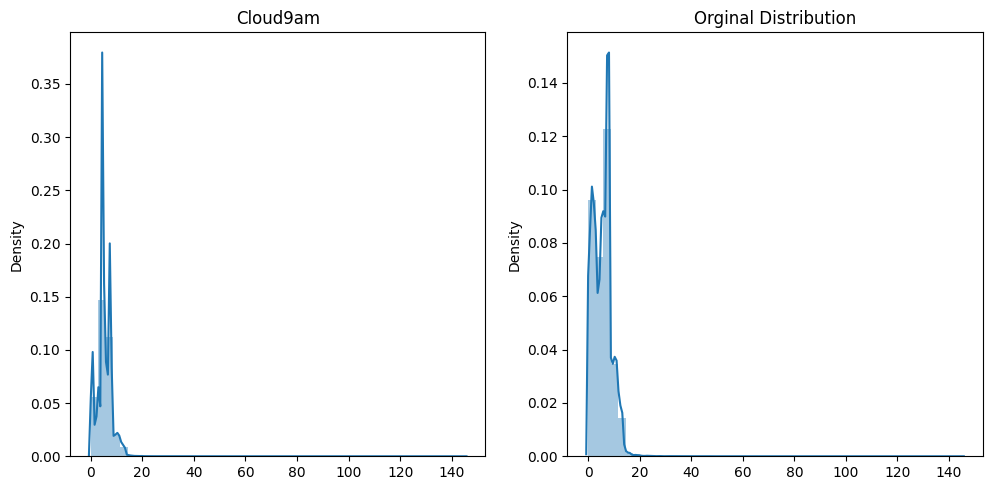

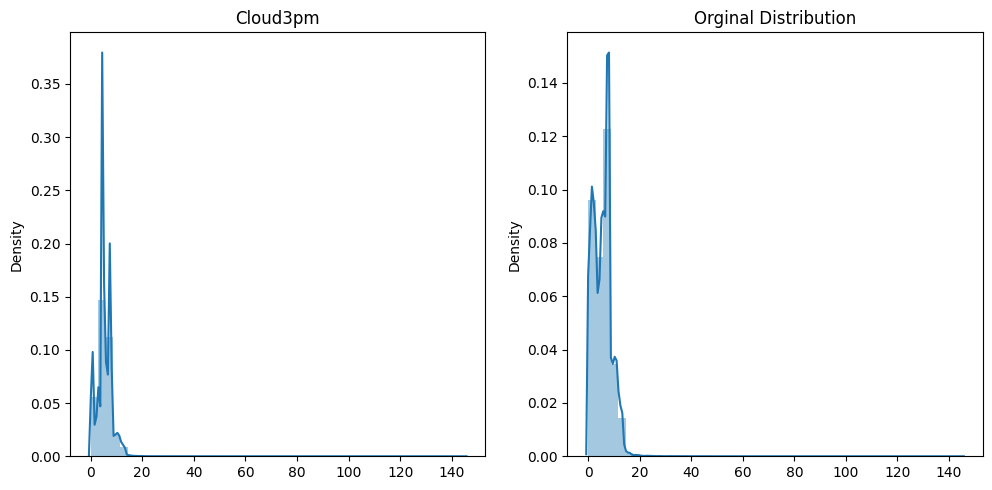

In [72]:
knn_imputed = ['Evaporation', 'Sunshine', 'Cloud9am' , 'Cloud3pm']
for i in range(len(knn_imputed)):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.distplot(df[knn_imputed])
    plt.title(knn_imputed[i])
    
    ax1 = f.add_subplot(132)
    sns.distplot(weather_df[knn_imputed])
    plt.title('Orginal Distribution')
    plt.tight_layout()
    plt.show()

<AxesSubplot: xlabel='RainTomorrow', ylabel='Count'>

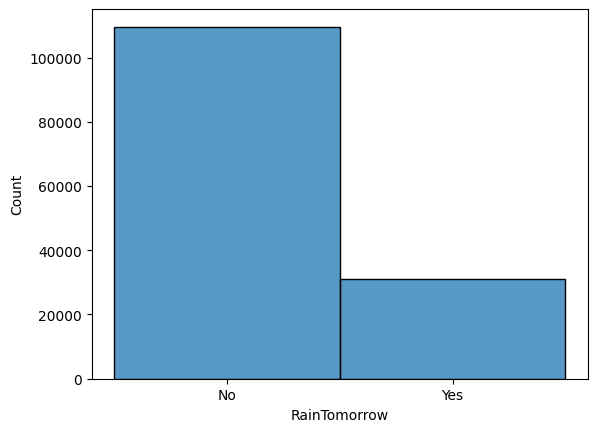

In [74]:
sns.histplot(x='RainTomorrow', data=weather_df)

# Feature Engineering

In [79]:
# extracting Year Month Day from Date column
df.Date = pd.to_datetime(df.Date)
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140787 non-null  float64       
 3   MaxTemp        140787 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    140787 non-null  float64       
 6   Sunshine       140787 non-null  float64       
 7   WindGustDir    131624 non-null  object        
 8   WindGustSpeed  140787 non-null  float64       
 9   WindDir9am     131127 non-null  object        
 10  WindDir3pm     137117 non-null  object        
 11  WindSpeed9am   140787 non-null  float64       
 12  WindSpeed3pm   140787 non-null  float64       
 13  Humidity9am    140787 non-null  float64       
 14  Humidity3pm    140787 non-null  float64       
 15  

In [81]:
# Updating numeric columns list as new columns are made
num_cols = df.select_dtypes(np.number).columns.to_list()

In [82]:
#names of object type columns
cat_cols = weather_df.select_dtypes('object').columns.to_list()

In [83]:
cat_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [84]:
#removing unwanted Columns name
cat_cols.remove('Date')
cat_cols.remove('RainTomorrow')
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Scaling Numeric Columns

In [85]:
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder

In [86]:
scaler = MinMaxScaler()

In [87]:
scaler.fit(df[num_cols])

MinMaxScaler()

In [88]:
df[num_cols] = scaler.transform(df[num_cols])
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,0.487850,0.529964,0.006334,0.037741,0.526244,0.250553,0.108657,0.210742,0.642206,0.514493,0.614125,0.610527,0.492351,0.499917,0.510276,0.520023,0.575749,0.491226,0.490490
std,0.150784,0.134343,0.022817,0.021926,0.189061,0.112811,0.069138,0.103334,0.179765,0.205470,0.111557,0.106920,0.253806,0.234384,0.136727,0.131916,0.254227,0.311508,0.293296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.027586,0.526244,0.186047,0.053846,0.126437,0.528625,0.370000,0.545455,0.542400,0.333333,0.444444,0.411392,0.424184,0.400000,0.181818,0.233333
50%,0.483491,0.519849,0.000000,0.037741,0.526244,0.240310,0.100000,0.195402,0.649189,0.514493,0.614125,0.610527,0.492351,0.499917,0.506329,0.512476,0.600000,0.454545,0.500000
75%,0.596698,0.623819,0.002156,0.037741,0.600000,0.310078,0.153846,0.275862,0.779027,0.650000,0.682645,0.676800,0.666667,0.666667,0.605485,0.608445,0.800000,0.727273,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# One Hot Encoding

In [89]:
weather_df[cat_cols].isna().sum()

Location          0
WindGustDir    9163
WindDir9am     9660
WindDir3pm     3670
RainToday         0
dtype: int64

In [90]:
weather_df[cat_cols] = weather_df[cat_cols].fillna('Unknown')

In [91]:
weather_df[cat_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [92]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(df[cat_cols])

OneHotEncoder(sparse_output=False)

In [93]:
#Name of encoded columns
encoded_cols = list(encoder.get_feature_names_out())
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [94]:
df[encoded_cols] = encoder.transform(df[cat_cols])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,2008-12-01,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2008-12-02,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2008-12-03,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2008-12-04,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2008-12-05,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
df.isnull().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
                 ..
WindDir3pm_WNW    0
WindDir3pm_WSW    0
WindDir3pm_nan    0
RainToday_No      0
RainToday_Yes     0
Length: 128, dtype: int64

# Preparing Data

In [96]:
x = df[num_cols].join(df[encoded_cols])
y = df['RainTomorrow']
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.658463,0.22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.408062,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.352417,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.417336,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.760479,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.283019,0.502836,0.000000,0.037741,0.526244,0.193798,0.115385,0.149425,0.547174,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,0.266509,0.533081,0.000000,0.037741,0.526244,0.193798,0.100000,0.126437,0.472981,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,0.285377,0.568998,0.000000,0.037741,0.526244,0.124031,0.100000,0.103448,0.519351,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,0.327830,0.599244,0.000000,0.037741,0.526244,0.240310,0.069231,0.103448,0.491529,0.24,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [97]:
y

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 140787, dtype: object

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.20, random_state=42)

In [102]:
xtrain.shape , ytrain.shape

((112629, 121), (112629,))

In [103]:
xtest.shape, ytest.shape

((28158, 121), (28158,))

# Modelling

In [104]:
from sklearn.linear_model import LogisticRegression

In [127]:
model = LogisticRegression(random_state=42, solver='liblinear', C = 5)

In [128]:
model.fit(xtrain,ytrain)

LogisticRegression(C=5, random_state=42, solver='liblinear')

In [129]:
model.score(xtrain , ytrain)

0.8518232426817249

In [130]:
yhat = model.predict(xtest)

# Evaluating

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

In [132]:
accuracy_score(ytest, yhat)

0.8478229987925279

Text(50.722222222222214, 0.5, 'Predictions')

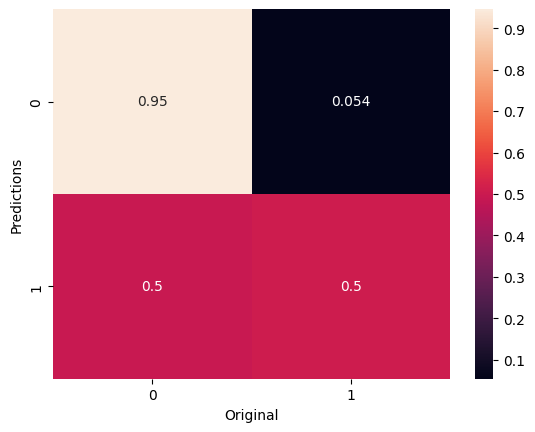

In [133]:
confuse = confusion_matrix(ytest, yhat, normalize='true')
sns.heatmap(confuse,  annot=True)
plt.xlabel('Original')
plt.ylabel('Predictions')

In [136]:
classification_report(ytest, yhat)

'              precision    recall  f1-score   support\n\n          No       0.87      0.95      0.91     21897\n         Yes       0.73      0.50      0.60      6261\n\n    accuracy                           0.85     28158\n   macro avg       0.80      0.72      0.75     28158\nweighted avg       0.84      0.85      0.84     28158\n'

# Our model has predicted very good in predicting 'True NO' but very poor on predicting 'True Yes'. It might because we can see above that there is very uneven distribution in RainTomorrow column. 

Checking Model with 'dumb' and 'random' model to check if our model learn something useful or it is just luck.

In [137]:
#random model
def randomg(args):
    return np.random.choice(['Yes','No'], len(args))
def all_no(args):
    return np.full(len(args), 'No')

In [138]:
accuracy_score(ytest, randomg(ytest))

0.4979757085020243

In [139]:
accuracy_score(ytest, all_no(ytest))

0.7776475601960366

# Model predicted quite good as the accuracy score for random model is significantly less than our model. and for All_no model its also high